In [5]:
# pip install dataframe_image

In [6]:
# Dependencies
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import math
import dataframe_image as df
from scipy.stats import linregress


file_1 = "co-est2021-pop-13.csv"
file_2 = "co-est2020-alldata.csv"

file_1_df = pd.read_csv(file_1, delimiter=",", skiprows=3)

file_1_df.tail(10)
recent_census =file_1_df.drop(range(160,165))
recent_census


,Unnamed: 0,Unnamed: 1,2020,2021
0,Georgia,"10,711,908","10,725,800","10,799,566"
1,".Appling County, Georgia","18,444","18,428","18,488"
2,".Atkinson County, Georgia","8,286","8,301","8,391"
3,".Bacon County, Georgia","11,140","11,123","11,079"
4,".Baker County, Georgia","2,876","2,844","2,819"
...,...,...,...,...
155,".Whitfield County, Georgia","102,864","102,727","102,848"
156,".Wilcox County, Georgia","8,766","8,731","8,739"
157,".Wilkes County, Georgia","9,565","9,556","9,513"
158,".Wilkinson County, Georgia","8,877","8,844","8,831"


In [7]:
#removing the '.' in front of the county names
recent_census21 = recent_census['Unnamed: 0'].str.replace('.','')

# removing 'Georgia' from the counties
county21 = recent_census21.str.split(',').str[0]

#print(county21)

C:\Users\yhuan\AppData\Local\Temp/ipykernel_14452/1222772202.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  recent_census21 = recent_census['Unnamed: 0'].str.replace('.','')


In [8]:
# extracting 2020 and 2021 columns
data21 = recent_census[['2020','2021']]

#convert object to int
census_20 = pd.to_numeric(data21['2020'].str.replace(',',''), errors = 'coerce')

#print(census_20)

In [9]:
#convert object to int
census_21 = pd.to_numeric(recent_census['2021'].str.replace(',',''), errors = 'coerce')

#print(census_21)

In [10]:
# create a cleaned up dataframe
organized_21 = pd.DataFrame({"County":county21,"2020":census_20, "2021":census_21 })

#set index to county
census21_df= organized_21.set_index("County")

#print(census21_df)

In [11]:
#read csv file
file_2_df = pd.read_csv(file_2, delimiter=",", encoding="ISO-8859-1")

# extract Georgia's data from national data
file_2_ga = file_2_df[file_2_df['STNAME'] == 'Georgia']
file_2_ga.to_csv('cleanerCounties.csv')
#print(file_2_ga)

In [12]:
#extract the population data of interest
ga_census_estimate_population = file_2_ga[["CTYNAME","POPESTIMATE2010","POPESTIMATE2011","POPESTIMATE2012","POPESTIMATE2013", "POPESTIMATE2014", "POPESTIMATE2015", "POPESTIMATE2016", "POPESTIMATE2017", "POPESTIMATE2018","POPESTIMATE2019"]]

#rename columns
ga_census_estimate_population = ga_census_estimate_population.rename(columns={"CTYNAME":"County","POPESTIMATE2010": "2010", "POPESTIMATE2011": "2011", "POPESTIMATE2012": "2012", "POPESTIMATE2013": "2013", "POPESTIMATE2014": "2014", "POPESTIMATE2015": "2015", "POPESTIMATE2016": "2016", "POPESTIMATE2017": "2017", "POPESTIMATE2018": "2018", "POPESTIMATE2019": "2019"})

#set index to county
ga_census_20 = ga_census_estimate_population.set_index("County")

#print(ga_census_20)

In [13]:
#merge csv files 

merge_census_raw = census21_df.merge(ga_census_20,how ='right', on ='County')

#label column names
column_names = ["2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021"]

#reindex

merge_census = merge_census_raw.reindex(columns=column_names)

#print(merge_census)

In [40]:
# select 10 random counties
samples_df = merge_census.sample(10)

#export randomly selected counties table
samples_df.dfi.export('plots_tables/sample_counties.png')

samples_df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,,
Henry County,205042,206934,208047,210089,213059,216548,221040,225246,229873,234671,241818,245235
Long County,14575,15097,16013,16510,17058,17695,18392,18822,19148,19647,16287,17152
Chattooga County,25958,25689,25635,25062,24871,24918,24847,24757,24836,24846,24921,24932
Terrell County,9525,9390,9225,9167,9081,9016,8873,8698,8601,8573,9153,8964
Baker County,3431,3311,3370,3346,3287,3192,3185,3158,3089,3047,2844,2819
Bryan County,30404,31300,32293,33082,33726,34860,35916,37091,38151,39692,44999,46938
Clay County,3176,3163,3107,3017,3074,3080,3015,2971,2901,2901,2835,2882
Franklin County,22082,21982,21927,22056,22187,22281,22333,22876,23039,23322,23429,23785
Wheeler County,7770,8078,7932,7934,7984,7909,8012,7958,7891,7870,7430,7471


In [41]:
#Transpose index and column
samples_df.T

County,Henry County,Long County,Chattooga County,Terrell County,Baker County,Bryan County,Clay County,Franklin County,Wheeler County,Laurens County
2010,205042,14575,25958,9525,3431,30404,3176,22082,7770,48388
2011,206934,15097,25689,9390,3311,31300,3163,21982,8078,47841
2012,208047,16013,25635,9225,3370,32293,3107,21927,7932,47819
2013,210089,16510,25062,9167,3346,33082,3017,22056,7934,47727
2014,213059,17058,24871,9081,3287,33726,3074,22187,7984,47553
2015,216548,17695,24918,9016,3192,34860,3080,22281,7909,47491
2016,221040,18392,24847,8873,3185,35916,3015,22333,8012,47287
2017,225246,18822,24757,8698,3158,37091,2971,22876,7958,47362
2018,229873,19148,24836,8601,3089,38151,2901,23039,7891,47293
2019,234671,19647,24846,8573,3047,39692,2901,23322,7870,47567


In [42]:
#collect statistics for 19, 20, 21
sample_19= samples_df['2019'].describe()
sample_20 = samples_df['2020'].describe()
sample_21 = samples_df['2020'].describe()

#create new df
sample_stat = pd.DataFrame({'2019': sample_19, '2020': sample_20, '2021': sample_21})

#export
sample_stat.dfi.export('plots_tables/sample_stat.png')

sample_stat


,2019,2020,2021
count,10.000000,10.000000,10.000000
mean,41213.600000,42321.300000,42321.300000
std,69620.655933,71980.114783,71980.114783
min,2901.000000,2835.000000,2835.000000
25%,8045.750000,7860.750000,7860.750000
50%,21484.500000,19858.000000,19858.000000
75%,35980.500000,39979.500000,39979.500000
max,234671.000000,241818.000000,241818.000000


In [36]:
# year to year percent change
samp_change = samples_df.pct_change(axis= 'columns', periods =1)

#dropping 2010 
clean_samp_change = samp_change.drop(columns= ['2010'])
# multiply by 100 for percent
per_samp_change= clean_samp_change*100

#export percent change table
per_samp_change.dfi.export('plots_tables/per_samp_change.png')

per_samp_change

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,
Hancock County,-0.413442,-3.363849,-1.387971,-4.256032,0.093338,0.757664,-1.145303,-2.352253,1.569990,2.914454,-1.054804
Madison County,-0.124021,-0.372525,0.470069,0.577748,0.193826,1.413950,1.456664,1.367381,0.917276,1.129490,2.055315
Hart County,0.701351,0.385614,-0.211665,-0.357451,0.189222,0.173126,0.978043,1.439241,0.678733,-1.481623,2.099281
Stephens County,-1.381871,-0.163024,-0.583181,-0.555317,0.180896,0.804711,0.408879,1.155711,-0.253038,3.009571,0.242537
Georgia,0.941300,1.019520,0.727131,0.958459,1.113561,1.228368,1.053399,0.982602,1.032674,0.920021,0.687744
Walker County,-0.074046,-0.491101,0.227780,0.103434,-0.160084,-0.138476,0.843685,0.607929,0.376940,-2.949734,1.180015
Coweta County,1.134134,0.945977,1.811444,1.662656,2.238315,1.695884,1.890283,1.986482,1.671197,-1.246431,2.252255
Chattahoochee County,0.759946,9.077196,-0.178964,-4.343574,-5.648322,-9.119639,1.311475,3.442189,4.199848,-13.729415,-4.577093
Wheeler County,3.963964,-1.807378,0.025214,0.630199,-0.939379,1.302314,-0.673989,-0.841920,-0.266126,-5.590851,0.551817


In [43]:
#collect statistics for 19, 20, 21
per_samp_19= per_samp_change['2019'].describe()
per_samp_20= per_samp_change['2020'].describe()
per_samp_21= per_samp_change['2021'].describe()

#create new df
per_samp_stat = pd.DataFrame({'2019': per_samp_19, '2020': per_samp_20, '2021': per_samp_19})

per_samp_stat


,2019,2020,2021
count,10.000000,10.000000,10.000000
mean,1.174620,-1.748691,1.174620
std,1.293243,4.961099,1.293243
min,-0.266126,-13.729415,-0.266126
25%,0.452389,-2.582706,0.452389
50%,0.974975,-0.854411,0.974975
75%,1.645895,1.077123,1.645895
max,4.199848,3.009571,4.199848


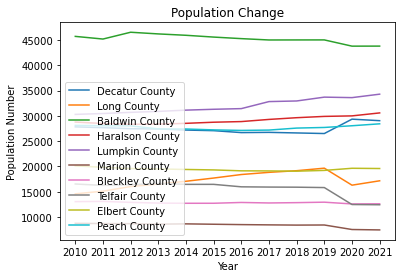

In [20]:
# plot sampled counties 
plt.plot(samples_df.T);
plt.legend(samples_df.index,loc="lower left")

#labeling
plt.title("Population Change")
plt.xlabel("Year")
plt.ylabel("Population Number")

#save figure 
plt.savefig('plots_tables/sample_counties_plot.png')
plt.show()

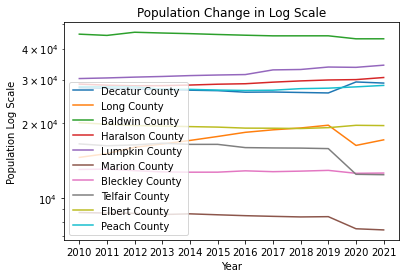

In [21]:
#plot sampled counties in log scale
plt.plot(samples_df.T);
plt.legend(samples_df.index,loc="lower left")

#labeling
plt.title("Population Change in Log Scale")
plt.xlabel("Year")
plt.ylabel("Population Log Scale")

#set log scale
plt.yscale('log')

#save figure
plt.savefig('plots_tables/sample_counties_plot_logscale.png')

plt.show()


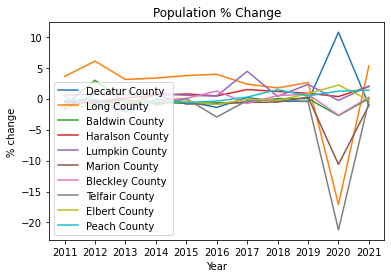

In [22]:
#plot percent change
plt.plot(per_samp_change.T);
plt.legend(per_samp_change.index,loc="lower left")

#labeling
plt.title("Population % Change")
plt.xlabel("Year")
plt.ylabel("% change")
plt.savefig('plots_tables/per_samp_change_plot.png')
plt.show()

The 10 counties are randomized when the kernal is restarted, but the counties that were selected are hard coded. These following counties are hard coded in reference to the initial merged dataframe.

In [23]:
#rename df
sample_counties = merge_census

#percent change
samp_change = sample_counties.pct_change(axis= 'columns', periods =1)

#drop 2010 
samp_change = samp_change.drop(columns=['2010'])
#multiply by 100 for percent
per_samp_change= samp_change*100

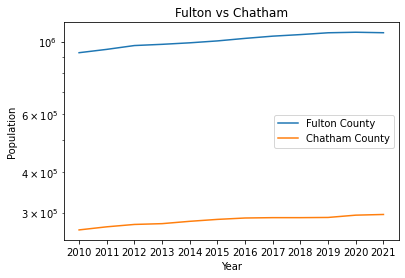

In [24]:
#compare the population change between Fulton and Chatham 
plt.plot(sample_counties.T['Fulton County'], label='Fulton County' );
plt.plot(sample_counties.T['Chatham County'], label='Chatham County' );
plt.legend(loc="best")
plt.yscale('log')

#labeling 
plt.title("Fulton vs Chatham")
plt.xlabel("Year")
plt.ylabel("Population")

#save figure
plt.savefig('plots_tables/fulton_chatham_plot.png')
plt.show()

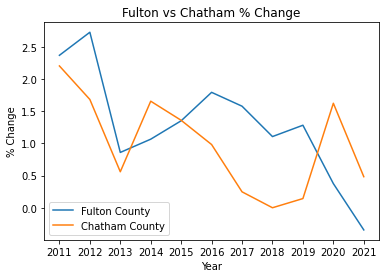

In [25]:
#compare % change between Fulton and Chatham
plt.plot(per_samp_change.T['Fulton County'], label='Fulton County');
plt.plot(per_samp_change.T['Chatham County'], label='Chatham County');
plt.legend(loc="lower left")

#labeling 
plt.title("Fulton vs Chatham % Change")
plt.xlabel("Year")
plt.ylabel("% Change")

plt.savefig('plots_tables/fulton_chatham_change_plot.png')
plt.show()

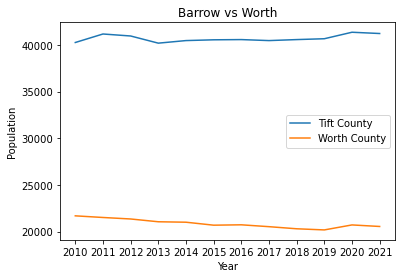

In [47]:
#compare population change between Barrow and County 
plt.plot(sample_counties.T['Barrow County'], label='Barrow County' );
plt.plot(sample_counties.T['Worth County'], label='Worth County' );
plt.legend(loc="best")

#labeling 
plt.title("Barrow vs Worth")
plt.xlabel("Year")
plt.ylabel("Population")

plt.savefig('plots_tables/barrow_worth_plot.png')
plt.show()

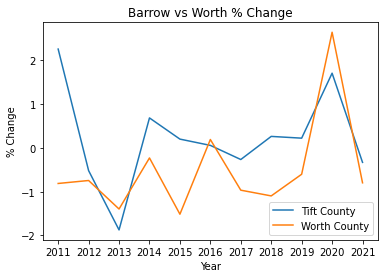

In [48]:
#compare % change between Barrow and Worth
plt.plot(per_samp_change.T['Tift County'], label='Tift County');
plt.plot(per_samp_change.T['Worth County'], label='Worth County');
plt.legend(loc="best")

#labeling 
plt.title("Barrow vs Worth % Change")
plt.xlabel("Year")
plt.ylabel("% Change")

plt.savefig('plots_tables/barrow_worth_change_plot.png')
plt.show()

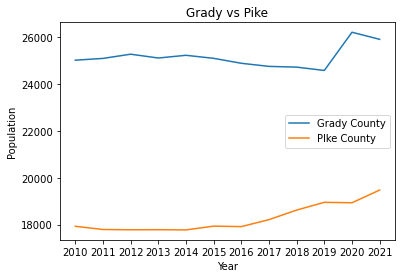

In [28]:
#compare the population change between Grady and Pike 
plt.plot(sample_counties.T['Grady County'], label='Grady County' );
plt.plot(sample_counties.T['Pike County'], label='PIke County' );
plt.legend(loc="best")

#labeling 
plt.title("Grady vs Pike")
plt.xlabel("Year")
plt.ylabel("Population")

plt.savefig('plots_tables/grady_pike_plot.png')
plt.show()

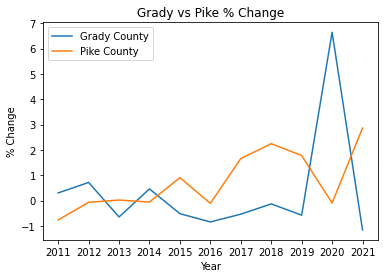

In [29]:
#compare % change between Grady and Pike
plt.plot(per_samp_change.T['Grady County'], label='Grady County');
plt.plot(per_samp_change.T['Pike County'], label='Pike County');
plt.legend(loc="best")
#labeling 
plt.title("Grady vs Pike % Change")
plt.xlabel("Year")
plt.ylabel("% Change")

plt.savefig('plots_tables/grady_pike_change_plot.png')
plt.show()

In [30]:
# setting the x and y axis 
fulton_years = sample_counties.T['Fulton County'].index.astype(float)
fulton_pop = sample_counties.T['Fulton County']

The r-squared is: 0.9674131773839155


<function matplotlib.pyplot.show(close=None, block=None)>

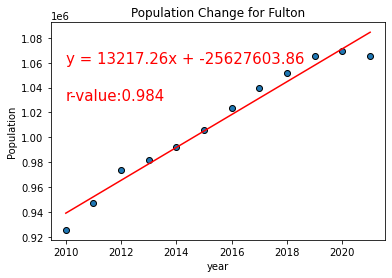

In [31]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(fulton_years,fulton_pop)
regress_values = fulton_years * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(fulton_years, fulton_pop, edgecolor = "black")

# draw our regression line
plt.plot(fulton_years,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2010,1060000),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2010,1030000), fontsize = 15, color = "red")
#labeling 
plt.title("Population Change for Fulton")
plt.xlabel("year")
plt.ylabel("Population")
plt.savefig('plots_tables/fulton_pop_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [32]:
# setting the x and y axis 
fulton_per = per_samp_change.T['Fulton County']
fulton_per_year = per_samp_change.T['Fulton County'].index.astype(float)

The r-squared is: 0.5665640906797728


<function matplotlib.pyplot.show(close=None, block=None)>

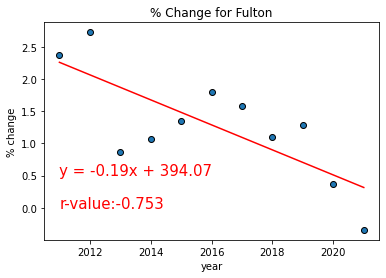

In [33]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(fulton_per_year,fulton_per)
regress_values = fulton_per_year * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(fulton_per_year, fulton_per, edgecolor = "black")

# draw our regression line
plt.plot(fulton_per_year,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2011,0.5),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2011,0), fontsize = 15, color = "red")
#labeling 
plt.title("% Change for Fulton")
plt.xlabel("year")
plt.ylabel("% change")
plt.savefig('plots_tables/fulton_pop_per_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [34]:
# setting the x and y axis 
chatham_years = sample_counties.T['Chatham County'].index.astype(float)
chatham_pop = sample_counties.T['Chatham County']

The r-squared is: 0.9337720205022068


<function matplotlib.pyplot.show(close=None, block=None)>

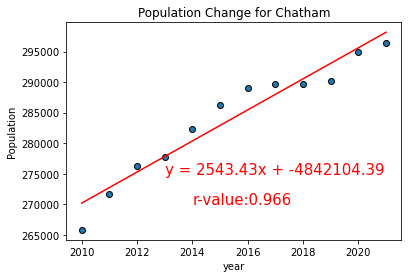

In [35]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(chatham_years,chatham_pop)
regress_values = chatham_years * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(chatham_years, chatham_pop, edgecolor = "black")

# draw our regression line
plt.plot(chatham_years,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2013,275000),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2014,270000), fontsize = 15, color = "red")
#labeling 
plt.title("Population Change for Chatham")
plt.xlabel("year")
plt.ylabel("Population")
plt.savefig('plots_tables/chatham_pop_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [36]:
# setting the x and y axis 
chatham_per = per_samp_change.T['Chatham County']
chatham_per_year = per_samp_change.T['Chatham County'].index.astype(float)

The r-squared is: 0.3403660066509065


<function matplotlib.pyplot.show(close=None, block=None)>

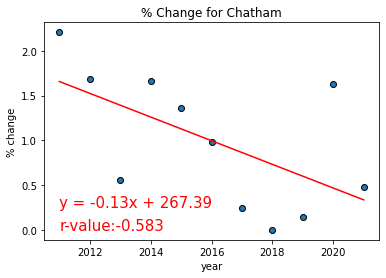

In [37]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(chatham_per_year,chatham_per)
regress_values = chatham_per_year * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(chatham_per_year, chatham_per, edgecolor = "black")

# draw our regression line
plt.plot(chatham_per_year,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2011,0.25),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2011,0), fontsize = 15, color = "red")
#labeling 
plt.title("% Change for Chatham")
plt.xlabel("year")
plt.ylabel("% change")
plt.savefig('plots_tables/chatham_pop_per_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [38]:
# setting the x and y axis 
grady_years = sample_counties.T['Grady County'].index.astype(float)
grady_pop = sample_counties.T['Grady County']

The r-squared is: 0.09159820413588947


<function matplotlib.pyplot.show(close=None, block=None)>

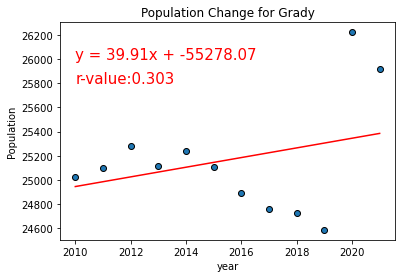

In [39]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(grady_years,grady_pop)
regress_values = grady_years * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(grady_years, grady_pop, edgecolor = "black")

# draw our regression line
plt.plot(grady_years,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2010,26000),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2010,25800), fontsize = 15, color = "red")
#labeling 
plt.title("Population Change for Grady")
plt.xlabel("year")
plt.ylabel("Population")
plt.savefig('plots_tables/grady_pop_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [40]:
# setting the x and y axis 
grady_per = per_samp_change.T['Grady County']
grady_per_year = per_samp_change.T['Grady County'].index.astype(float)

The r-squared is: 0.04592530592906027


<function matplotlib.pyplot.show(close=None, block=None)>

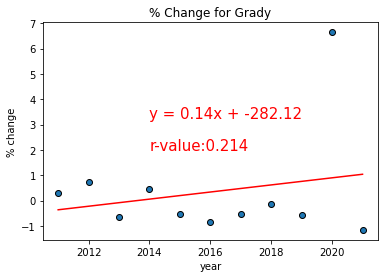

In [41]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(grady_per_year,grady_per)
regress_values = grady_per_year * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(grady_per_year, grady_per, edgecolor = "black")

# draw our regression line
plt.plot(grady_per_year,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2014,3.25),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2014,2), fontsize = 15, color = "red")
#labeling 
plt.title("% Change for Grady")
plt.xlabel("year")
plt.ylabel("% change")
plt.savefig('plots_tables/grady_pop_per_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [42]:
# setting the x and y axis 
worth_years = sample_counties.T['Worth County'].index.astype(float)
worth_pop = sample_counties.T['Worth County']

The r-squared is: 0.7764997093787491


<function matplotlib.pyplot.show(close=None, block=None)>

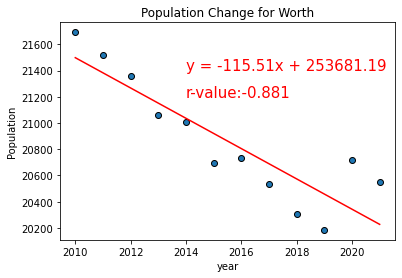

In [43]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(worth_years,worth_pop)
regress_values = worth_years * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(worth_years, worth_pop, edgecolor = "black")

# draw our regression line
plt.plot(worth_years,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2014,21400),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2014,21200), fontsize = 15, color = "red")
#labeling 
plt.title("Population Change for Worth")
plt.xlabel("year")
plt.ylabel("Population")
plt.savefig('plots_tables/worth_pop_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [44]:
# setting the x and y axis 
worth_per = per_samp_change.T['Worth County']
worth_per_year = per_samp_change.T['Worth County'].index.astype(float)

The r-squared is: 0.15259008460634854


<function matplotlib.pyplot.show(close=None, block=None)>

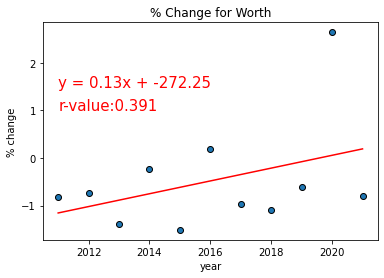

In [45]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(worth_per_year,worth_per)
regress_values = worth_per_year * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(worth_per_year, worth_per, edgecolor = "black")

# draw our regression line
plt.plot(worth_per_year,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2011,1.5),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2011,1), fontsize = 15, color = "red")
#labeling 
plt.title("% Change for Worth")
plt.xlabel("year")
plt.ylabel("% change")
plt.savefig('plots_tables/worth_pop_per_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show